# plot pdf of z with different $\tau_{res}$ and fixed $\tau_{mix}/\tau_{res}$

In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
# parameters
params = {}
params['MIX'] = 'EMSTHYB'
params['tres'] = None
params['tmix'] = 0.2
params['eqv'] = 1.0

In [3]:
tau_log = np.linspace(-2.5,-3.5,3)

In [4]:
csv_name = 'ZCTR.csv'

npts = 100
z_lb = 0
z_ub = 0.156

In [5]:
pdfs = np.empty([npts, len(tau_log)])
for i, t in enumerate(tau_log):
    params['tres'] = t
    case_name = params2name(params)
    
    data = np.genfromtxt('/'.join([case_name,csv_name]),
                         delimiter=',',
                         names=True)
    
    hist, bins = np.histogram(data['Z'], 
                              bins=npts, 
                              range=(z_lb, z_ub), 
                              density=True
                             )

    pdfs[:,i] = hist

In [6]:
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 6.7
margin_left   = 1.4
margin_right  = 0.1
margin_bottom = 1.0
margin_top    = 0.1
space_width   = 3.5
space_height  = 0.5
ftsize        = 9

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=[r'\usepackage{amsmath}',r'\usepackage{bm}'])
# use serif font
plt.rc('font',**font)

num_cols = 1
num_rows = 1

colors = ['tab:blue','tab:green','tab:red']
lines = ['--','-','-.']

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(num_cols-1)*space_width)/num_cols
subplot_height = subplot_width * 0.8

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

(0, 400)

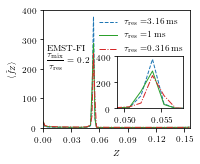

In [10]:
z = (bins[1:]+bins[:-1])/2

# plot against tmix
fig, ax = plt.subplots(num_rows,num_cols,sharex=True,
                       figsize=cm2inch(plot_width,plot_height))

for i, t in enumerate(tau_log):
    ax.plot(z, pdfs[:,i],
            c = colors[i], ls = lines[i], lw = 1.,
            label=''.join([
                r'$\tau_{\mathrm{res}}=$',
                '{:.3g}'.format(np.power(10.,t)*1000),
                r'$\;\mathrm{ms}$'])
           )
    
# legend
ax.legend(frameon=False)

# limits
ax.set_xlim([z_lb, z_ub])
ax.set_ylim([0, 400])
ax.set_xticks(np.linspace(0,0.15,6))

# labels
ax.set_xlabel(r'$Z$')
ax.set_ylabel(r'$\langle\tilde{f}_Z\rangle$')

ax.text(0.005,200,
        ''.join([
            'EMST-FI\n',
            r'$\dfrac{\tau_{\mathrm{mix}}}{\tau_{\mathrm{res}}}=0.2$'])
       )

fig.subplots_adjust(left = margin_left/plot_width,
                    bottom = margin_bottom/plot_height,
                    right = 1.0-margin_right/plot_width,
                    top = 1.0-margin_top/plot_height,
                    wspace = space_width/plot_width,
                    hspace = space_height/plot_height
                    )

axs = fig.add_axes([0.6, 0.32, 0.35, 0.35])
for i, t in enumerate(tau_log):
    axs.plot(z, pdfs[:,i],
            c = colors[i], ls = lines[i], lw = 1.)

axs.set_xlim([0.049,0.058])
axs.set_ylim([0, 400])

In [11]:
fig.savefig('fig_pdf_z_EMSTHYB_tres.pdf')
fig.savefig('fig_pdf_z_EMSTHYB_tres.eps')